In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
# import talib as ta
from sklearn import neighbors
from sklearn import svm
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Crude Oil - MCX.csv")
df = df.drop(df.columns[[0]], axis=1)
df.head()

,Uopen,Ulow,Uhigh,Uclose
0,6054,6026,6073,6047
1,6074,5968,6088,5997
2,6019,6019,6098,6088
3,6095,6091,6231,6221
4,6230,6197,6264,6209


In [3]:
N = 2
w = 2*N + 1

for i in range(0,df.shape[0]-1):
    df.loc[df.index[i],'c'] = df['Uclose'][i] - df['Uclose'][i+1]
    
df.head(10)

,Uopen,Ulow,Uhigh,Uclose,c
0,6054,6026,6073,6047,50.0
1,6074,5968,6088,5997,-91.0
2,6019,6019,6098,6088,-133.0
3,6095,6091,6231,6221,12.0
4,6230,6197,6264,6209,1.0
5,6208,6208,6208,6208,-51.0
6,6197,6177,6273,6259,78.0
7,6196,6175,6254,6181,-18.0
8,6170,6148,6215,6199,41.0
9,6210,6152,6225,6158,8.0


In [4]:
for i in range(0,df.shape[0]-(2*N+1)):
    s = 0
    for j in range((2*N)+1):
        s += df['Uclose'][i+j]
    s = s*1.0
    s = s/((2*N)+1)
    df.loc[df.index[i+N],'ma'] = s

df.head()

,Uopen,Ulow,Uhigh,Uclose,c,ma
0,6054,6026,6073,6047,50.0,NaN
1,6074,5968,6088,5997,-91.0,NaN
2,6019,6019,6098,6088,-133.0,6112.4
3,6095,6091,6231,6221,12.0,6144.6
4,6230,6197,6264,6209,1.0,6197.0


In [5]:
for i in range(0,df.shape[0]-N):
    h = df['Uhigh'][i]
    l = df['Ulow'][i]
    for j in range(N):
        if h<df['Uhigh'][i+j]:
            h = df['Uhigh'][i+j]
        if l>df['Ulow'][i+j]:
            l = df['Ulow'][i+j]
    R = (h - df['Uclose'][i+N])*(-100)/(h-l)
    df.loc[df.index[i+N],'R'] = R
    

df.head()

,Uopen,Ulow,Uhigh,Uclose,c,ma,R
0,6054,6026,6073,6047,50.0,NaN,NaN
1,6074,5968,6088,5997,-91.0,NaN,NaN
2,6019,6019,6098,6088,-133.0,6112.4,0.000000
3,6095,6091,6231,6221,12.0,6144.6,94.615385
4,6230,6197,6264,6209,1.0,6197.0,-10.377358


In [6]:
for i in range(0,df.shape[0]-N):
    h = 0
    l = 0
    vr = 0
    for j in range(N):
        h += df['Uhigh'][i+j]
        l += df['Ulow'][i+j]
    h = h*1.0/N
    l = l*1.0/N
    x = (df['Uhigh'][i+N] + df['Uclose'][i+N-1])/2
    y = (df['Ulow'][i+N] + df['Uclose'][i+N-1])/2
    if x!=y:
        vr = (h-l)*1.0/(x-y)
    df.loc[df.index[i+N],'VR'] = vr
    

df.head(10)

,Uopen,Ulow,Uhigh,Uclose,c,ma,R,VR
0,6054,6026,6073,6047,50.0,NaN,NaN,NaN
1,6074,5968,6088,5997,-91.0,NaN,NaN,NaN
2,6019,6019,6098,6088,-133.0,6112.4,0.000000,2.113924
3,6095,6091,6231,6221,12.0,6144.6,94.615385,1.421429
4,6230,6197,6264,6209,1.0,6197.0,-10.377358,3.268657
5,6208,6208,6208,6208,-51.0,6215.6,-32.369942,0.000000
6,6197,6177,6273,6259,78.0,6211.2,-7.462687,0.697917
7,6196,6175,6254,6181,-18.0,6201.0,-95.833333,1.215190
8,6170,6148,6215,6199,41.0,6189.4,-75.510204,2.611940
9,6210,6152,6225,6158,8.0,6167.0,-90.566038,2.000000


In [7]:
# df['RSI'] = ta.RSI(df['Uclose'].values, timeperiod = N)

# df.head(10)

In [8]:
df['EMA'] = df.iloc[:,3].ewm(span=N,adjust=False).mean()

df.head()

,Uopen,Ulow,Uhigh,Uclose,c,ma,R,VR,EMA
0,6054,6026,6073,6047,50.0,NaN,NaN,NaN,6047.000000
1,6074,5968,6088,5997,-91.0,NaN,NaN,NaN,6013.666667
2,6019,6019,6098,6088,-133.0,6112.4,0.000000,2.113924,6063.222222
3,6095,6091,6231,6221,12.0,6144.6,94.615385,1.421429,6168.407407
4,6230,6197,6264,6209,1.0,6197.0,-10.377358,3.268657,6195.469136


In [9]:
M = pd.Series(df['Uclose'].diff(1))  
aM = abs(M) 
r = N+1
s = N+1
EMA1 = M.ewm(span = r, min_periods = r - 1).mean()  
aEMA1 = aM.ewm(span = r, min_periods = r - 1).mean()
EMA2 = EMA1.ewm(span = s, min_periods = s - 1).mean() 
aEMA2 = aEMA1.ewm(span = s, min_periods = s - 1).mean()
TSI = pd.Series(EMA2 / aEMA2, name = 'TSI_' + str(r) + '_' + str(s))  
df['TSI'] = TSI

df.head(10)

,Uopen,Ulow,Uhigh,Uclose,c,ma,R,VR,EMA,TSI
0,6054,6026,6073,6047,50.0,NaN,NaN,NaN,6047.000000,NaN
1,6074,5968,6088,5997,-91.0,NaN,NaN,NaN,6013.666667,NaN
2,6019,6019,6098,6088,-133.0,6112.4,0.000000,2.113924,6063.222222,NaN
3,6095,6091,6231,6221,12.0,6144.6,94.615385,1.421429,6168.407407,0.790593
4,6230,6197,6264,6209,1.0,6197.0,-10.377358,3.268657,6195.469136,0.733745
5,6208,6208,6208,6208,-51.0,6215.6,-32.369942,0.000000,6203.823045,0.702558
6,6197,6177,6273,6259,78.0,6211.2,-7.462687,0.697917,6240.607682,0.779772
7,6196,6175,6254,6181,-18.0,6201.0,-95.833333,1.215190,6200.869227,0.114339
8,6170,6148,6215,6199,41.0,6189.4,-75.510204,2.611940,6199.623076,0.043266
9,6210,6152,6225,6158,8.0,6167.0,-90.566038,2.000000,6171.874359,-0.231640


In [10]:
for i in range(0,df.shape[0]-N-1):
    bs = ''
    for j in range(N+1):
        if df['c'][i+j]>=0:
            bs+= '0'
        else:
            bs+= '1' 
    bs = int(bs, 2)
    if(bs < 2**N):
        bs=0
    else:
        bs=1
    df.loc[df.index[i+N],'y'] = bs

df.head(10)

,Uopen,Ulow,Uhigh,Uclose,c,ma,R,VR,EMA,TSI,y
0,6054,6026,6073,6047,50.0,NaN,NaN,NaN,6047.000000,NaN,NaN
1,6074,5968,6088,5997,-91.0,NaN,NaN,NaN,6013.666667,NaN,NaN
2,6019,6019,6098,6088,-133.0,6112.4,0.000000,2.113924,6063.222222,NaN,0.0
3,6095,6091,6231,6221,12.0,6144.6,94.615385,1.421429,6168.407407,0.790593,1.0
4,6230,6197,6264,6209,1.0,6197.0,-10.377358,3.268657,6195.469136,0.733745,1.0
5,6208,6208,6208,6208,-51.0,6215.6,-32.369942,0.000000,6203.823045,0.702558,0.0
6,6197,6177,6273,6259,78.0,6211.2,-7.462687,0.697917,6240.607682,0.779772,0.0
7,6196,6175,6254,6181,-18.0,6201.0,-95.833333,1.215190,6200.869227,0.114339,1.0
8,6170,6148,6215,6199,41.0,6189.4,-75.510204,2.611940,6199.623076,0.043266,0.0
9,6210,6152,6225,6158,8.0,6167.0,-90.566038,2.000000,6171.874359,-0.231640,1.0


In [11]:
df

,Uopen,Ulow,Uhigh,Uclose,c,ma,R,VR,EMA,TSI,y
0,6054,6026,6073,6047,50.0,NaN,NaN,NaN,6047.000000,NaN,NaN
1,6074,5968,6088,5997,-91.0,NaN,NaN,NaN,6013.666667,NaN,NaN
2,6019,6019,6098,6088,-133.0,6112.4,0.000000,2.113924,6063.222222,NaN,0.0
3,6095,6091,6231,6221,12.0,6144.6,94.615385,1.421429,6168.407407,0.790593,1.0
4,6230,6197,6264,6209,1.0,6197.0,-10.377358,3.268657,6195.469136,0.733745,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1686,3885,3862,3907,3894,59.0,3870.0,-38.400000,2.800000,3893.337433,0.334167,1.0
1687,3859,3769,3865,3835,-4.0,3874.2,-133.750000,1.020833,3854.445811,-0.183479,0.0
1688,3822,3793,3869,3839,-54.0,NaN,-49.275362,1.855263,3844.148604,-0.289532,0.0
1689,3858,3802,3904,3893,66.0,NaN,24.000000,1.686275,3876.716201,0.173070,1.0


In [12]:
df = df.iloc[4:]
df = df.iloc[:2455]


In [13]:
df.isnull().sum()

Uopen     0
Ulow      0
Uhigh     0
Uclose    0
c         1
ma        3
R         0
VR        0
EMA       0
TSI       0
y         1
dtype: int64

In [14]:
# X = df.iloc[:, 5:-1]
# y = df.iloc[:, -1]
# split = int(len(df)*0.85)
# X_train, X_test, y_train, y_test = X[:split], X[split:split+365], y[:split], y[split:split+365]
# clf = svm.SVC(kernel = 'poly')
# clf.fit(X_train, y_train)
# confidence = clf.score(X_test, y_test)
# print('accuracy:',confidence)
# predictions = clf.predict(X_test)
# print('predicted class counts:',Counter(predictions))

In [15]:
X = df.iloc[:, 5:-1]
y = df.iloc[:, -1]
# split = int(len(df)*0.85)
# X_train, X_test, y_train, y_test = X[:split], X[split:split+365], y[:split], y[split:split+365]

# # sc = StandardScaler()
# # X_train = sc.fit_transform(X_train)
# # X_test = sc.transform(X_test)

# clf = svm.SVC(kernel = 'poly')
# clf.fit(X_train, y_train)
# confidence = clf.score(X_test, y_test)
# print('accuracy:',confidence)
# predictions = clf.predict(X_test)
# print('predicted class counts:',Counter(predictions))
# print(df['c'][1000])
confidence = 0
k=3
clf = svm.SVC(kernel = 'poly')
clf2 = neighbors.KNeighborsClassifier(k)
w=50
predicted_price = []
actual_price = []
days = 1
i=0
while(i<1680):
    if(i+w+days<=1680):
        value=[]
        X_train, y_train = X[i:i+w], y[i:i+w]
        clf.fit(X_train, y_train)
        for k in range(days):
            X_test, y_test = X[i+w+k:i+w+k+1], y[i+w+k:i+w+k+1]
            val=clf.score(X_test, y_test)
            value.append(val)
        
#         confidence +=value

        predictions = clf.predict(X_test)
        clf2.fit(X_train, y_train)
        for k in range(days):
            sum2=0
            count=0
            deltac=0
            for j in range(w):
                if(df['y'][i+j+6]==value[k]):
                    count+=1
                    sum2+=df['c'][i+j+6]
            deltac=sum2/count;
            predicted_price.append(df['Uclose'][i+w+5+k]+deltac)
            actual_price.append(df['Uclose'][i+w+6+k])
            print(str(df['Uclose'][i+w+6+k]) + " entry is " + str(df['Uclose'][i+w+5+k]+deltac))
        i=i+days
            
    else:
        break
        


5714 entry is 5642.277777777777
5775 entry is 5719.78125
5780 entry is 5788.0
5850 entry is 5784.645161290323
5673 entry is 5854.645161290323
5686 entry is 5677.7
5560 entry is 5694.633333333333
5552 entry is 5575.619047619048
5556 entry is 5558.551724137931
5485 entry is 5571.619047619048
5382 entry is 5504.590909090909
5264 entry is 5393.392857142857
5284 entry is 5283.590909090909
5219 entry is 5304.952380952381
5122 entry is 5243.409090909091
5109 entry is 5133.758620689655
5095 entry is 5135.2
5079 entry is 5121.2
5025 entry is 5105.2
5002 entry is 5050.9473684210525
5026 entry is 5027.9473684210525
4968 entry is 5051.9473684210525
4979 entry is 4992.1
4985 entry is 4988.322580645161
5083 entry is 5001.35
5017 entry is 5092.275862068966
4931 entry is 5026.275862068966
4963 entry is 4939.689655172414
4721 entry is 4986.0
4833 entry is 4742.7
4814 entry is 4852.433333333333
4861 entry is 4832.85
4783 entry is 4882.322580645161
4773 entry is 4794.55
4756 entry is 4798.266666666666
46

3158 entry is 3030.56
3049 entry is 3155.56
3039 entry is 3033.25
2950 entry is 3037.0384615384614
2930 entry is 2946.4
2941 entry is 2926.1153846153848
2892 entry is 2950.478260869565
2771 entry is 2905.695652173913
2689 entry is 2774.037037037037
2735 entry is 2702.695652173913
2703 entry is 2741.9545454545455
2673 entry is 2715.909090909091
2664 entry is 2674.464285714286
2833 entry is 2680.0
2828 entry is 2849.0
2876 entry is 2838.0476190476193
2860 entry is 2872.0
2851 entry is 2870.0
2821 entry is 2852.896551724138
2798 entry is 2825.65
2773 entry is 2806.7894736842104
2700 entry is 2781.7894736842104
2791 entry is 2706.6111111111113
2684 entry is 2797.6111111111113
2529 entry is 2698.4210526315787
2528 entry is 2536.15625
2496 entry is 2543.823529411765
2467 entry is 2511.823529411765
2403 entry is 2483.3125
2453 entry is 2419.3125
2519 entry is 2469.3125
2385 entry is 2545.25
2315 entry is 2395.5
2292 entry is 2325.8571428571427
2385 entry is 2320.785714285714
2427 entry is 241

3581 entry is 3603.230769230769
3614 entry is 3573.7083333333335
3585 entry is 3605.5416666666665
3614 entry is 3576.5416666666665
3614 entry is 3610.423076923077
3579 entry is 3604.9166666666665
3500 entry is 3572.730769230769
3514 entry is 3490.0833333333335
3544 entry is 3503.28
3609 entry is 3539.0833333333335
3545 entry is 3611.8076923076924
3565 entry is 3548.423076923077
3551 entry is 3568.423076923077
3588 entry is 3542.6666666666665
3565 entry is 3588.269230769231
3623 entry is 3560.7391304347825
3668 entry is 3625.423076923077
3601 entry is 3662.0416666666665
3633 entry is 3601.269230769231
3615 entry is 3632.88
3623 entry is 3610.75
3566 entry is 3622.576923076923
3604 entry is 3565.0416666666665
3537 entry is 3603.84
3556 entry is 3538.76
3550 entry is 3557.56
3558 entry is 3550.2
3425 entry is 3567.84
3271 entry is 3432.56
3229 entry is 3282.076923076923
3203 entry is 3234.782608695652
3136 entry is 3208.782608695652
3178 entry is 3141.782608695652
3192 entry is 3185.45454

4547 entry is 4543.0
4583 entry is 4536.607142857143
4487 entry is 4571.913043478261
4512 entry is 4475.913043478261
4571 entry is 4502.076923076923
4668 entry is 4561.130434782609
4749 entry is 4652.428571428572
4623 entry is 4739.0
4799 entry is 4605.535714285715
4757 entry is 4779.814814814815
4793 entry is 4745.363636363636
4794 entry is 4773.214285714285
4850 entry is 4786.142857142857
4820 entry is 4829.586206896552
4832 entry is 4795.620689655172
4855 entry is 4807.620689655172
4919 entry is 4848.45
4929 entry is 4893.806451612903
4913 entry is 4902.451612903225
4859 entry is 4888.96875
4597 entry is 4834.96875
4508 entry is 4609.894736842105
4527 entry is 4519.3
4614 entry is 4533.619047619048
4517 entry is 4625.55
4428 entry is 4501.733333333334
4351 entry is 4414.448275862069
4392 entry is 4362.809523809524
4342 entry is 4405.545454545455
4443 entry is 4353.952380952381
4445 entry is 4425.448275862069
4472 entry is 4453.8
4478 entry is 4454.433333333333
4506 entry is 4460.096

3897 entry is 3949.8260869565215
3933 entry is 3911.818181818182
3978 entry is 3947.818181818182
3967 entry is 3995.9545454545455
4116 entry is 3969.222222222222
4132 entry is 4117.571428571428
4138 entry is 4136.130434782609
4086 entry is 4142.346153846154
3947 entry is 4090.346153846154
3916 entry is 3952.3333333333335
3815 entry is 3927.913043478261
3800 entry is 3827.409090909091
3894 entry is 3812.409090909091
3916 entry is 3906.409090909091
3908 entry is 3928.217391304348
3908 entry is 3914.5555555555557
3869 entry is 3915.714285714286
3905 entry is 3882.095238095238
3987 entry is 3918.095238095238
4032 entry is 3997.4545454545455
3790 entry is 4032.5
3891 entry is 3791.814814814815
3903 entry is 3894.6296296296296
3858 entry is 3911.1304347826085
3641 entry is 3861.6296296296296
3696 entry is 3642.535714285714
3892 entry is 3707.3636363636365
3906 entry is 3902.2608695652175
4037 entry is 3889.5384615384614
3914 entry is 4015.64
3896 entry is 3890.6666666666665
3997 entry is 390

3166 entry is 3153.1290322580644
3226 entry is 3164.1290322580644
3235 entry is 3213.4736842105262
3172 entry is 3235.7096774193546
3149 entry is 3173.40625
3145 entry is 3151.7741935483873
3145 entry is 3136.65
3059 entry is 3141.1428571428573
3044 entry is 3056.0
2903 entry is 3045.5454545454545
2899 entry is 2904.6521739130435
2705 entry is 2909.7391304347825
2804 entry is 2711.1666666666665
2765 entry is 2811.48
2743 entry is 2773.2083333333335
2748 entry is 2750.68
2828 entry is 2752.3076923076924
2940 entry is 2828.875
3024 entry is 2944.3076923076924
2993 entry is 3028.3076923076924
2857 entry is 2997.96
2920 entry is 2859.346153846154
2947 entry is 2924.913043478261
2973 entry is 2950.625
2969 entry is 2973.1923076923076
2989 entry is 2969.48
2877 entry is 2996.52
2934 entry is 2877.52
2837 entry is 2944.9615384615386
2899 entry is 2832.3333333333335
2972 entry is 2908.8846153846152
2916 entry is 2969.76
3025 entry is 2924.68
2960 entry is 3032.28
2889 entry is 2958.08
2958 ent

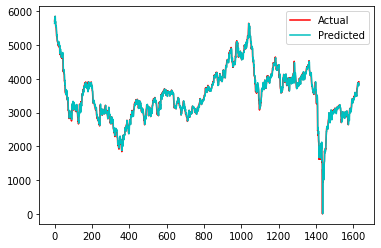

In [16]:
plt.plot(actual_price, "r", label = "Actual")
plt.plot(predicted_price, "c", label = "Predicted")
plt.legend()
plt.show()

In [17]:
import math
rmse = 0
for i in range(len(actual_price)):
    rmse += (actual_price[i] - predicted_price[i])**2
rmse = rmse/len(actual_price)
rmse = math.sqrt(rmse)

print(rmse)

100.7859809930066
